# Le problème du collectionneur de bille

<p>
Pendant la période de Noël, la Migros offrait 1 bille pour chaque dépense de 20 CHf dans ses magasins. Il existait 20 billes différentes à collectionner. <br> Question : Quel montant était-il nécessaire de dépenser en moyenne pour avoir toutes les billes ?
</p>

## PARTIE I : Résolution empirique :

In [89]:
import random
import string
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
#Commençons par ecrire un script Python qui simule nos tirages de billes aléatoire :

random.seed(4)
list_nbr_tirage = list()
int_nbr_collectionneurs = 10000

#Cette boucle a pour but de simuler un grand nombre d'experience
#Ici, il s'agit 1000 collectionneurs qui vont faire des courses jusqu'à ce qu'ils aient toutes les billes
for _ in range(int_nbr_collectionneurs):
    
    #Liste des différentes billes disponibles, chaque bille possède une lettre qui la différencie (de A à T)
    billes = list(string.ascii_uppercase)[0:20]
    
    #Liste des billes non tirées par le collectionneur :
    check = list(string.ascii_uppercase)[0:20]
    
    #Liste de l'historique des billes tirées par le collectionneur
    tirage = list()
    
    #Cette boucle simule les tirages d'un seul colectionneur
    while len(check) != 0 :
        
        new_bille = random.choice(billes)
        
        if new_bille in check :
            check.remove(new_bille)
        
        tirage.append(new_bille)
        
    #On sauvegarde dans cette liste le nombre de tirage nécessaire pour chaque collectionneur 
    list_nbr_tirage.append(len(tirage))
    df_nbr_tirage = pd.DataFrame(list_nbr_tirage, columns = ['nbr tirage'])


In [91]:
df_nbr_tirage.head(10)
#En obervant les 10 premières expèriences, nous constatons :
#     - que le collectionneur le plus chanceux obtient toutes les billes pour 1000 CHf d'achât (50*20CHf)
#     - que le moins chaceux a dû debourser 2340 CHf (117 * 20CHf) 

,nbr tirage
0,55
1,62
2,75
3,63
4,68
5,105
6,71
7,117
8,86
9,50


In [92]:
#Sur les 10000 collectionneurs, il est nécesssaire d'effectuer en moyenne 72 tirages pour obtenir toutes les billes
#C'est à dire dépenser 72*20 = 1440 CHf en moyenne
meanEmp = df_nbr_tirage['nbr tirage'].mean()
meanEmp

72.0168

In [93]:
#Voici les maximum et minimum sur les 1000 collectionneurs, il y a beaucoup de disparité entre les collectionneurs
maxi = df_nbr_tirage.max()
mini = df_nbr_tirage.min()

print(int(maxi), 'tirages')
print('Soit', int(maxi)*20, 'CHf dépensés')

print(int(mini), 'tirages')
print('Soit', int(mini)*20, 'CHf dépensés')

267 tirages
Soit 5340 CHf dépensés
25 tirages
Soit 500 CHf dépensés


In [94]:
#La variance est très elevée, il y a beaucoup de dispersion autour de la moyenne.
varianceEmp = df_nbr_tirage['nbr tirage'].var()
print('Variance = ', math.ceil(varianceEmp))
ecartTypeEmp = math.sqrt(varianceEmp)
print('Ecart-Type = ', math.ceil(ecartTypeEmp))

Variance =  572
Ecart-Type =  24


Text(0.5, 1.0, 'Répartition des collectionneurs selon le nombre de tirages')

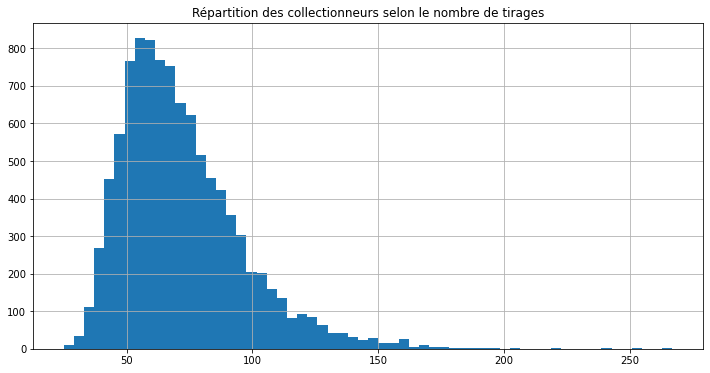

In [95]:
#Répartition des collectionneurs selon le nombre de tirages
df_nbr_tirage['nbr tirage'].hist(bins=60, figsize=(12,6))
plt.title('Répartition des collectionneurs selon le nombre de tirages')

Text(0.5, 1.0, 'Densité des collectionneurs selon le nombre de tirages')

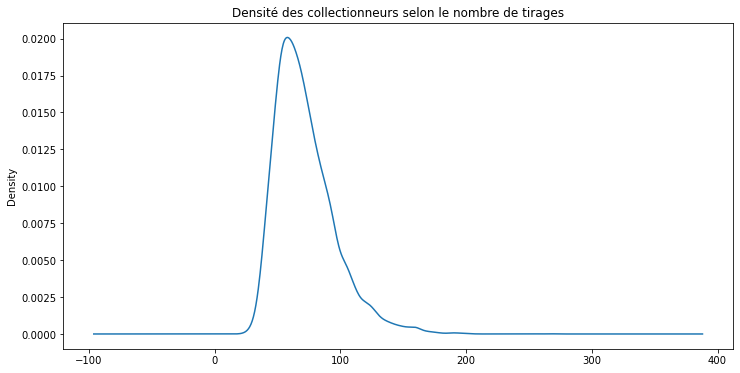

In [96]:
#Densité des collectionneurs selon le nombre de tirage
df_nbr_tirage['nbr tirage'].plot.density(figsize = (12,6))
plt.title('Densité des collectionneurs selon le nombre de tirages')

## PARTIE 2 : Résolution mathématique :

<h2>Quelques prérequis indispensables</h2>

<h3>A propos des suites géométriques :</h3>
<p>
Suite géométrique définie par relation de récurence :
$
       \left\{
          \begin{array}{ll}
            u_{n+1}=q\times u_{n}, & n ∈ \mathbb {N}\\
            u_{0}=a &\\
          \end{array}
        \right.
$<br>
    
Suite géométrique définie en fonction de n : $u_{n}=u_{0}\times q^n = a\times q^n$

</p>

<h4>Somme des termes d'une suite géométrique :</h4>

<p>
Il est important d'avoir en tête, la formule suivante :
${\displaystyle S_{n}=\sum _{0\leq k\leq n}a\times q^{k}=a\,{\frac {1-q^{n+1}}{1-q}}}$.
</p>
<h5>Démonstration :</h5>
<p>
Il existe plusieurs manières de démontrer ce résultat, en voici une. Considérons les 2 égalités suivantes :<br>
    <ul>
        <li>${S}_n = a + aq + aq^2 + ... + aq^{n-1} + aq^n$</li>
        <li>$q{S}_n = aq + aq^2 + ... + aq^{n-1} + aq^n + aq^{n+1}$</li>
    </ul>

On les soustrait l'une avec l'autre :
${S}_n - q{S}_n = a - (aq - aq) - (aq^2 - aq^2) - ... - (aq^{n-1} - aq^{n-1}) - (aq^n - aq^n) - aq^{n+1} $

On obtient donc : ${\displaystyle \left(1-q\right)S_{n}=a\left(1-q^{n+1}\right)}$, c'est à dire ${\displaystyle S_{n}=a\,{\cfrac {1-q^{n+1}}{1-q}}}$
</p>

<h3>A propos de la loi géométrique :</h3>
<p>
C'est une loi de probabilité discrète définie telle que : ${\displaystyle {P} (X=k)=q^{k-1}p}$
</p>
<p>
La probabilité que X = k correspond à la probabilité d'obtenir k-1 echecs et 1 succès sur un ensemble de k épreuves de Bernoulli indépendantes avec :
    <ul>
        <li> $k ∈ \mathbb {N}$,  </li>
        <li> q : probabilité d'obtenir un echec</li>
        <li> p : probabilité d'obtenir un succès tel que $p = 1- q$</li>
    </ul>
</p>
<h4>Espérance de la loi géométrique :</h4>

<p>
L'espérance de la loi géométrique est donnée par la formule :
${\displaystyle{E} [X]= \frac {1}{p}}$.
</p>
<h5>Démonstration :</h5>
<p>
Nous avons démontré plus haut que ${\displaystyle \sum _{k=0}^{k=n}q^{k}=\,{\frac {1-q^{n+1}}{1-q}}}$ 
or pour ${\displaystyle 0<q<1}$,${\displaystyle \lim_{n \to +\infty} \frac {1-q^{n+1}}{1-q} = \frac {1}{1-q}}$, ainsi, ${\displaystyle \sum _{k=0}^{+\infty }q^{k} = \frac {1}{1-q}}$.
</p>
<p>
Soit ${\displaystyle f(k) = \sum _{k=0}^{+\infty }q^{k} = \frac {1}{1-q}}$. 
La dérivée de f est ${\displaystyle f'(k) = \sum _{k=1}^{+\infty }kq^{k-1} = \frac {1}{(1-q)^2}}$.<br>
Soit X, une variable aléatoire discrète suivant une loi géométrique tel que : ${\displaystyle {P} (X=k)=q^{k-1}p}$<br>
Nous avons donc ${\displaystyle{E} (X)=\sum _{k=1}^{+\infty }kq^{k-1}p = f'(k)\times p = \frac {p}{(1-q)^2} = \frac {p}{p^2} = \frac {1}{p}}$.
</p>

<h4>Variance de la loi géométrique :</h4>

<p>
La variance de la loi géométrique est donnée par la formule : 
${\displaystyle Var(X) = \frac{q}{p^2}}$
</p>

<h5>Démonstration :</h5>

<p>

Tout d'abord reprenons la dérivée de la fonction f définie plus haut : ${\displaystyle f'(k) = \sum _{k=1}^{+\infty }kq^{k-1} = \frac {1}{(1-q)^2}}$ <br>
    
Nous dérivons f une seconde fois :
${\displaystyle f''(k) = \sum_{k=2}^{+\infty}k(k-1) \times q^{k-2}}$ <br>

Soit l'égalité A définie telle que : ${\displaystyle A = q \times f''(k) + f'(k) = \frac{2q}{(1-q)^3} + \frac{1}{(1-q)^2}}$<br>
${\displaystyle A = q \sum_{k=2}^{+\infty} k(k-1)q^{k-2} + \sum _{k=1}^{+\infty }kq^{k-1}}$<br>
${\displaystyle A = 2q + 6q^{2} + 12q^{3} + ... +q \times k(k-1)q^{k-2} + ... + q^{0} + 2q + 3q^{2}+4q^{3} + ... + kq^{k-1} + ...}$<br>
${\displaystyle A = 1 + 4q + 9q^{2} + 16q^{3} + ... + (k(k-1)q^{k-1} + kq^{k-1}) + ...}$<br>
${\displaystyle A = 1^2q^{1-1} + 2^2q^{2-1} + 3^2q^{3-1} + 4^2q^{4-1} + ... + (k^2 - k + k)\times q^{k-1} + ...}$<br>
${\displaystyle A = \sum_{k=1}^{+\infty} k^2q^{k-1}}$<br>
On obtient donc ${\displaystyle A = \sum_{k=1}^{+\infty} k^2q^{k-1} = \frac{2q}{(1-q)^3} + \frac{1}{(1-q)^2} = \frac{2}{(1-q)^3} - \frac{1}{(1-q)^2}}$<br>
Explication pour la dernière égalité : ${\displaystyle D + B = C - B}$ donc, ${\displaystyle C = D + 2B}$, on obtient : ${\displaystyle C = \frac{2q}{(1-q)^3} + 2 \times \frac{1}{(1-q)^2} = \frac{2}{(1-q)^3} }$
    
</p>

<p>
Selon le théorême de König-Huygens : ${\displaystyle Var(X) = {E}(X^2) - {E}(X)^2}$
    
Dans notre cas nous avons : 
<ul>
    <li>${\displaystyle {E}(X^2) = p\times \sum_{k=1}^{+\infty}k^2q^{k-1} = \frac{2p}{(1-q)^3} - \frac{p}{(1-q)^2} = \frac{2p}{p^3} - \frac{p}{p^2} = \frac{2}{p^2} - \frac{1}{p} }$</li>
    <li>${\displaystyle {E}(X)^2 = \frac{1}{p^2}} $</li>

</ul>
On a donc ${\displaystyle Var(X) = \frac{2}{p^2} - \frac{1}{p} - \frac{1}{p^2}= \frac{1-p}{p^2} = \frac{q}{p^2}}$

</p>

<h4>Fonction de répartition d'une loi géométrique :</h4>

<p>
X suit la loi géométrique de paramètre p. Soit F la fonction de répartition de la variable X. On a alors : ${\displaystyle F(n) = P(X \leq n) = 1 - q^{n}}$<br>
    
</p>

<h5>Démonstration :</h5>
<p>
Nous savons que ${\displaystyle {P} (X=n)=q^{n-1}p}$, par conséquent ${\displaystyle F(n) = {P} (X \leq n)=p \times \sum_{k=1}^{k=n} q^{k-1} = p \times \sum_{k=0}^{k=n-1} q^{k} = p \times \frac {1-q^{n}}{1-q}} $.<br>
    
On sait que ${\displaystyle p = 1-q}$, donc ${F(n) = 1-q^{n}}$.
</p>

In [97]:
class LoiGeometric :
    
    def __init__(self, p):
        self.q = 1 - p
        self.p = p        
    
    def calcEsperance(self):
        self.esperance = 1/self.p
        return self.esperance
    
    def calcVariance(self):
        self.variance = self.q/self.p**2
        return self.variance
    
    def calcEcartType(self):
        self.ecartType = sqrt(self.q)/self.p
        return self.ecartType
        
    def calcProbability(self, k):
        return (self.q**(k-1))*self.p
    
    def calcFctRepartition(self, k):
        return 1 - self.q**k
    
    def calcFctRepartitionReverse(self, pct):
       r= 0
       while self.q**r >= 1-pct :
           r+=0.0001
       return r+1
   
    def reprLoiGeometric (self, kmax):
        x = np.arange(1,kmax)
        y = self.calcProbability(x)
        fig = plt.figure(figsize = (12,6))
        axes1 = fig.add_axes([0.1,0.1,0.9,0.9])
        axes1.scatter(x,y)
        axes1.grid()
        axes1.set_ylabel('Probabilité d\'obtenir une nouvelle bille avec X tirages')
        axes1.set_xlabel('Nbr de tirage')
        axes1.set_title('Loi géométrique avec probabilité {} de succés'.format(self.p))
        
    def reprFctRepartition (self, kmax):
        x = np.arange(1,kmax)
        y = self.calcFctRepartition(x)
        fig = plt.figure(figsize = (12,6))
        axes2 = fig.add_axes([0.1,0.1,0.9,0.9])
        axes2.scatter(x,y)
        axes2.grid()
        axes2.set_ylabel('Probabilité d\'obtenir une nouvelle bille')
        axes2.set_xlabel('Nbr de tirage')
        axes2.set_title('Fct de répartition d\'une loi géométrique avec probabilité {} de succés'.format(self.p))
        

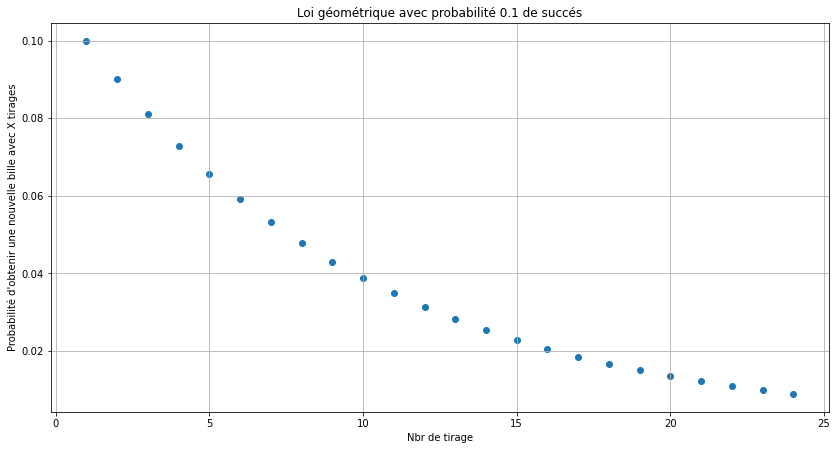

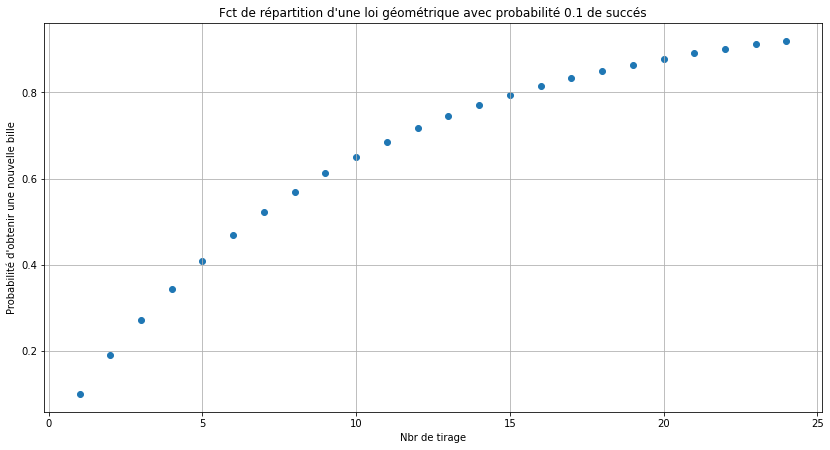

In [98]:
#Exemple de loi géométrique avec p = 2/20. Cela représente le cas où notre collectionneur possède déjà 18 billes
#différentes et essaie d'en obtenir une 19ème.
newLaw = LoiGeometric (2/20)
newLaw.reprLoiGeometric(25)
newLaw.reprFctRepartition(25)

<h3>Revenons au problème de notre collection de bille</h3>

<p>Soit la variable aléatoire T suivante : ${\displaystyle T_{n}=\sum _{i=1}^{n}t_{i}}$ </p>

<p>
    <ul>
        <li>
        T : le nombre de tirage avec remise nécessaire pour obtenir toutes les billes. On peut considérer T comme le temps nécessaire pour obtenir toutes les billes en supposant que à chaque pas de temps, on tire une nouvelle bille.
        </li>
        <li>
        n : le nombre de billes différentes à collectionner. Ici n = 20.
        </li>
        <li>
        $t_{i}$ : temps supplémentaire pour obtenir une i-ème bille sachant que le collectionneur en a déjà i-1. Cela signifie que si le collectionneur possède déjà i-1 billes sur les 20 billes à collectionner alors la probabilité d'en obtenir une nouvelle au tirage suivant est : ${\displaystyle p = \frac {n-(i-1)}{n}}$
        </li>
    </ul>
<p>
<p>
    $t_{i}$ suit une loi géométrique de paramètre ${\displaystyle p = \frac {n-(i-1)}{n}}$, ainsi nous savons que ${\displaystyle  E (t_{i}) = \frac{1}{p}}$

    
</p>

<p>
    Par linéarité de l'espérance : ${\displaystyle {E} (T_{n})= {E} (t_{1})+ {E} (t_{2})+\cdots + {E} (t_{n}) = \sum_{i = 1}^{n}{E} (t_{i})}$<br>
    La solution à notre problème est le résultat du calcul : ${\displaystyle \sum_{i = 1}^{i=20}{E} (t_{i}) = \sum_{i = 1}^{i=20}\frac {n}{n-(i-1)}}$

</p>

In [99]:
#La classe collection permet de calculer le nombre de tirage à faire en moyenne pour obtenir toutes les billes
#Elle permet également de calculer la variance sur ce nombre de tirage
class Collection :
    def __init__(self, nbr_billes):
        self.nbr_billes = nbr_billes # le seul parametre de la classe est le nombre de billes à collectionner
        self.list_esperance = list()
        self.list_variance = list()
        self.list_geometricLaws = [LoiGeometric(b/nbr_billes) for b in range(1, nbr_billes + 1)]
    
    def calculEsperance (self):
        esperanceTot = 0
        for law in self.list_geometricLaws :
            e = law.calcEsperance() #objets LoiGeometric stockés dans une liste pour calculer l'esperance
            self.list_esperance.append(e)
            esperanceTot += e            
        
        return esperanceTot
    
    def calculVariance (self):
        varianceTot = 0
        for law in self.list_geometricLaws :
            v = law.calcVariance()
            self.list_variance.append(v)
            varianceTot += v
            
        return varianceTot

In [100]:
collection = Collection(20)
mean20 = collection.calculEsperance()
print('Le nombre de tirage moyen nécessaire pour obtenir toutes les billes est {}.'.format(mean20))
print('Empiriquement, nous avions calculés {} tirages pour obtenir les 20 billes.'.format(meanEmp))

Le nombre de tirage moyen nécessaire pour obtenir toutes les billes est 71.95479314287363.
Empiriquement, nous avions calculés 72.0168 tirages pour obtenir les 20 billes.


In [101]:
Var20 = collection.calculVariance()
EcarT20 = math.sqrt(Var20)
print('La variance pour 20 billes est {}, experimentalement nous avions obtenus {}.'.format(Var20,varianceEmp))
print('Pour l\'ecart-type, nous avions obtenus {} experimentalement et nous avonss {} par calcul.'.format(EcarT20, 
                                                                                                    ecartTypeEmp))

La variance pour 20 billes est 566.5105044223355, experimentalement nous avions obtenus 571.5000677667767.
Pour l'ecart-type, nous avions obtenus 23.801481139255504 experimentalement et nous avonss 23.906067593119047 par calcul.


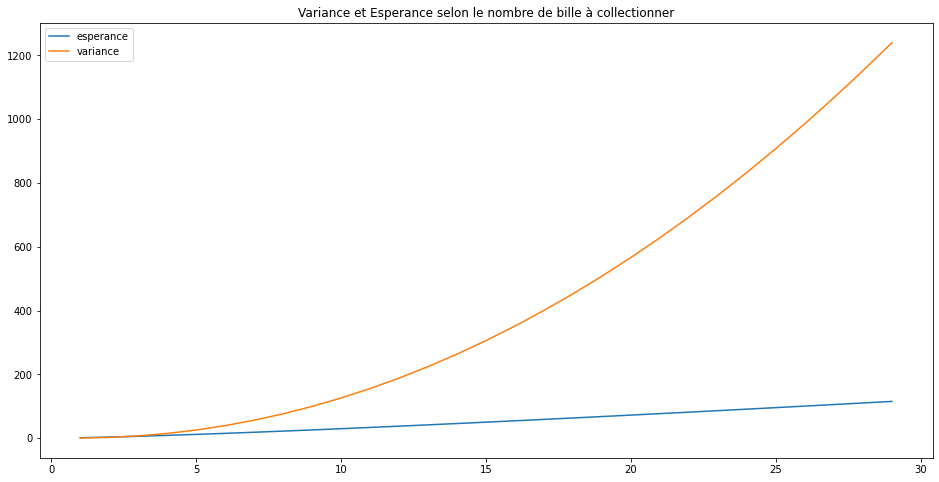

In [102]:
#Pour le plaisir voici le graphique montrant l'évolution du nombre de tirage et de la variance en fonction
# du nombre de billes à collectionner
list_e = list()
list_v = list()
for c in range(1,30) :
    newCollection = Collection(c)
    list_e.append(newCollection.calculEsperance())
    list_v.append(newCollection.calculVariance())

    
df_study = pd.DataFrame(list_e, columns = ['esperance'], index = [_ for _ in range(1,30)])
df_study['variance'] = list_v
df_study.plot(figsize = (16,8), title = 'Variance et Esperance selon le nombre de bille à collectionner')

In [103]:
#Tableau du nombre de tirage et de la variance selon le nombre de bille à collectionner
df_study

,esperance,variance
1,1.000000,0.000000
2,3.000000,2.000000
3,5.500000,6.750000
4,8.333333,14.444444
5,11.416667,25.173611
6,14.700000,38.990000
7,18.150000,55.928056
8,21.742857,76.012154
9,25.460714,99.260472
10,29.289683,125.687091


## Conclusion

<p>
La réponse à la question initiale est donc 72 * 20 = 1440. Il fallait en moyenne dépenser 1440 CHF à la Migros pour obtenir toutes les billes. Cependant il y a une grande variabilité pour 20 billes la variance est de 566 !
</p>

<h3>Ouverture vers d'autres questions</h3>
<p>Il serait également intéressant d'étudier le cas ou un groupe d'amis échangent leurs billes. Ainsi le nombre moyen de tirage pourrait diminuer notament selon la taille du groupe d'amis. Il serait également intéressant de calculer le nombre de tirage pour être sûr à 99% d'avoir toutes les billes. Enfin, il serait intéressant d'envisager le cas où certaines billes sont plus rares que d'autres. Mais c'est une autre histoire....</p>